### 공공 데이터 프로젝트  
    - 수온과 어획량의 관계 분석

In [1]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import koreanize_matplotlib
import seaborn as sns
import numpy as np

In [2]:
# tabulate를 활용한 시각화
def show_data(Dname):
    print(tabulate(Dname, headers='key', tablefmt='pretty'))

In [3]:
## 데이터 로딩

# 어획 수확량 데이터
cuttle_fish= pd.read_excel('갑오징어.xlsx')

# 수온 데이터
wt_2014 = pd.read_csv('water_temp_2014.csv', encoding='euc_kr')
wt_2015 = pd.read_csv('water_temp_2015.csv', encoding='euc_kr')
wt_2016 = pd.read_csv('water_temp_2016.csv', encoding='euc_kr')
wt_2017 = pd.read_csv('water_temp_2017.csv', encoding='euc_kr')
wt_2018 = pd.read_csv('water_temp_2018.csv', encoding='euc_kr')
wt_2019 = pd.read_csv('water_temp_2019.csv', encoding='euc_kr')
wt_2020 = pd.read_csv('water_temp_2020.csv', encoding='euc_kr')
wt_2021 = pd.read_csv('water_temp_2021.csv', encoding='euc_kr')
wt_2022 = pd.read_csv('water_temp_2022.csv', encoding='euc_kr')
wt_2023 = pd.read_csv('water_temp_2023.csv', encoding='euc_kr')

In [4]:
show_data(cuttle_fish)
print(cuttle_fish.columns)

+-----+---------+-----------+-------------+-----------+-------------+-----------+-------------+-----------+-------------+--------+-----------+
|     |         |           |             |           |             |           |             |           |      k      |   e    |     y     |
+-----+---------+-----------+-------------+-----------+-------------+-----------+-------------+-----------+-------------+--------+-----------+
|  0  |  시점   | 생산량:계 | 생산금액:계 | 생산량:계 | 생산금액:계 | 생산량:계 | 생산금액:계 | 생산량:계 | 생산금액:계 | 생산량 | 생산금액  |
|  1  | 2014.01 |    101    |   737339    |   30991   |  86941586   |    16     |    32808    |   8160    |  17121213   | 39268  | 104832946 |
|  2  | 2014.02 |    78     |   470209    |   2568    |  11253890   |     6     |    9612     |   11462   |  22971366   | 14114  | 34705077  |
|  3  | 2014.03 |    75     |   647216    |    760    |   4722868   |     1     |    1604     |   24562   |  35245156   | 25398  | 40616844  |
|  4  | 2014.04 |    212    |   3047741   | 

In [5]:
# 컬럼 명 수정
cuttle_fish.columns=['시점', '갑오징어류_1_수', '갑오징어류_1_금액', '살오징어_수', '살오징어_금액', '갑오징어류_2_수', 
                     '갑오징어류_2_금액', '오징어류_수', '오징어류_금액', '합계_수', '합계_금액' ]
show_data(cuttle_fish)
# 필요없는 행 제거
cuttle_fish.drop(index=0 ,inplace=True)
show_data(cuttle_fish)
change_list= [10, 22, 34, 46, 58, 70, 82, 94, 106, 118]
change_year= ['2014.01','2015.01','2016.01','2017.01','2018.01','2019.01','2020.01','2021.01','2022.01','2023.01']


+-----+---------+-----------+-------------+-----------+-------------+-----------+-------------+-----------+-------------+--------+-----------+
|     |         |           |             |           |             |           |             |           |      k      |   e    |     y     |
+-----+---------+-----------+-------------+-----------+-------------+-----------+-------------+-----------+-------------+--------+-----------+
|  0  |  시점   | 생산량:계 | 생산금액:계 | 생산량:계 | 생산금액:계 | 생산량:계 | 생산금액:계 | 생산량:계 | 생산금액:계 | 생산량 | 생산금액  |
|  1  | 2014.01 |    101    |   737339    |   30991   |  86941586   |    16     |    32808    |   8160    |  17121213   | 39268  | 104832946 |
|  2  | 2014.02 |    78     |   470209    |   2568    |  11253890   |     6     |    9612     |   11462   |  22971366   | 14114  | 34705077  |
|  3  | 2014.03 |    75     |   647216    |    760    |   4722868   |     1     |    1604     |   24562   |  35245156   | 25398  | 40616844  |
|  4  | 2014.04 |    212    |   3047741   | 

#### 수온데이터  
    시간별로 수온이 기록되어 있음 => 어획량과 시간단위를 맞추기 위해 월별로 변환시켜야 함!

In [6]:
temp_list = [wt_2014, wt_2015, wt_2016, wt_2017, wt_2018,
             wt_2019, wt_2020, wt_2021, wt_2022, wt_2023]
# 월별 수온으로 변환하는 함수
def make_month_temp(data):
    list_data = []
    for i in range(len(data)):
        list_data.append(data['일시'][i][:7])
    data['일시'] = list_data
    data

    month_temp = []
    for i in sorted(data['일시'].value_counts().index):
        if data.columns[8] == '수온(°C)':
            month_temp.append(data[data['일시'] == i]['수온(°C)'].mean())
        else:
            month_temp.append(data[data['일시'] == i]['평균 수온(°C)'].mean())
    return month_temp

In [7]:
# 각 데이터 월별로 변환
temp_2014= make_month_temp(wt_2014)
temp_2015= make_month_temp(wt_2015)
temp_2016= make_month_temp(wt_2016)
temp_2017= make_month_temp(wt_2017)
temp_2018= make_month_temp(wt_2018)
temp_2019= make_month_temp(wt_2019)
temp_2020= make_month_temp(wt_2020)
temp_2021= make_month_temp(wt_2021)
temp_2022= make_month_temp(wt_2022)
temp_2023= make_month_temp(wt_2023)
temp_list=[temp_2014, temp_2015, temp_2016, temp_2017, temp_2018, temp_2019, 
           temp_2020, temp_2021, temp_2022, temp_2023]

In [9]:
temp=[]
for df in temp_list:
    temp.extend(df)
cuttle_fish['수온']=temp  #수온 열 추가
cuttle_fish['연']=cuttle_fish['시점'].astype(int) #연(year) 열 추가
cuttle_fish['연'].astype(str)
    
month= list(range(1,13))   #월 열 추가
month_list=[]
for i in range(10):
    month_list.extend(month)
cuttle_fish['월']= month_list
cuttle_fish['월'].astype(str)

cuttle_fish.drop(columns='시점', inplace=True)# 시점 열 삭제
cuttle_fish['시점']= cuttle_fish['연'].astype(str)+ '.' + cuttle_fish['월'].astype(str) #datetime 시점 생성

In [ ]:
cuttle_fish.head()
## -> 수온이 월별 평균으로 변환된 것을 확인할 수 있다.

,갑오징어류_1_수,갑오징어류_1_금액,살오징어_수,살오징어_금액,갑오징어류_2_수,갑오징어류_2_금액,오징어류_수,오징어류_금액,합계_수,합계_금액,수온,연,월,시점
1,101,737339,30991,86941586,16,32808,8160,17121213,39268,104832946,12.914825,2014,1,2014.1
2,78,470209,2568,11253890,6,9612,11462,22971366,14114,34705077,11.535285,2014,2,2014.2
3,75,647216,760,4722868,1,1604,24562,35245156,25398,40616844,10.651902,2014,3,2014.3
4,212,3047741,225,1900449,3,4704,39961,49066852,40401,54019746,13.357103,2014,4,2014.4
5,869,8002343,285,1722833,12,18456,41540,52209697,42706,61953329,15.639946,2014,5,2014.5


In [17]:
# 특정 월의 그래프 그리는 함수
def draw_graph(month, colname):
    filter= cuttle_fish['월']==month
    x=cuttle_fish[filter]['연']
    y=cuttle_fish[filter][colname]
    plt.plot(x, y)
    plt.xlabel('연도')
    plt.ylabel(colname)
    plt.title(str(month)+'월')
    plt.savefig('img/'+ (str(month)+'월')+ colname + '.png', dpi=100)
    plt.show()

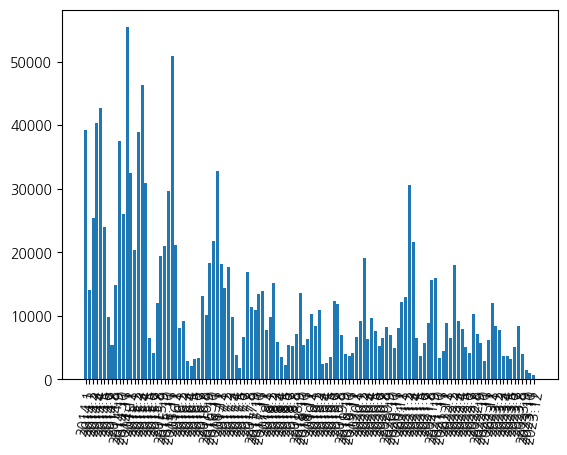

In [18]:
# 1. 전체 수확량 그래프
plt.bar(cuttle_fish['시점'], cuttle_fish['합계_수'])
plt.xticks(rotation=80 ) 
plt.show()
# -> 가독성 떨어짐

In [51]:
cuttle_fish.columns

Index(['갑오징어류_1_수', '갑오징어류_1_금액', '살오징어_수', '살오징어_금액', '갑오징어류_2_수',
       '갑오징어류_2_금액', '오징어류_수', '오징어류_금액', '합계_수', '합계_금액', '수온', '연', '월',
       '시점'],
      dtype='object')

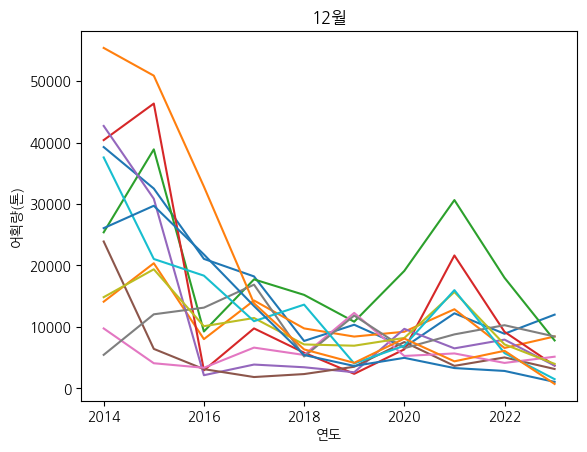

In [55]:
#월별 수확량 변화 그래프 (중첩)

for i in range(1,13):
    month_cuttle_total=[]
    year= range(2014,2024)
    filter= cuttle_fish['월']==i
    month_cuttle_total.append(cuttle_fish[filter].sum)
    x=[]
    y=[]
    x=cuttle_fish[filter]['연']
    y=cuttle_fish[filter]['합계_수']
    plt.plot(x, y)
    plt.xlabel('연도')
    plt.ylabel('어획량(톤)')
    plt.title(str(i)+'월')
    plt.savefig('img/'+ (str(i)+'월')+ '.png', dpi=100)
    ## 전체적으로 수확량이 떨어지고 있는 것을 알 수 있음

<function matplotlib.pyplot.show(close=None, block=None)>

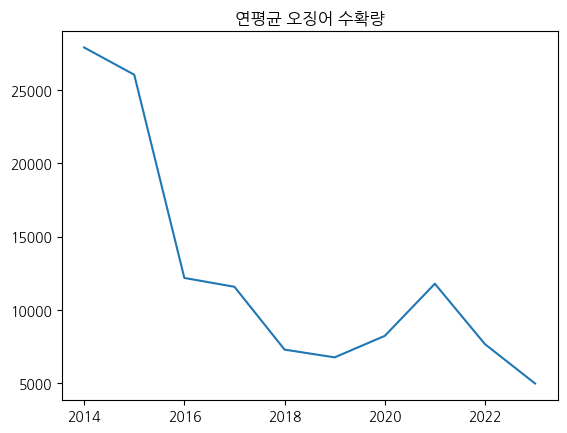

In [63]:
# 연평균 수확량의 변화
year_catch= cuttle_fish.groupby('연')['합계_수'].mean()

x= range(2014,2024)
y=year_catch
plt.plot(x,y)
plt.title('연평균 오징어 수확량')
plt.show

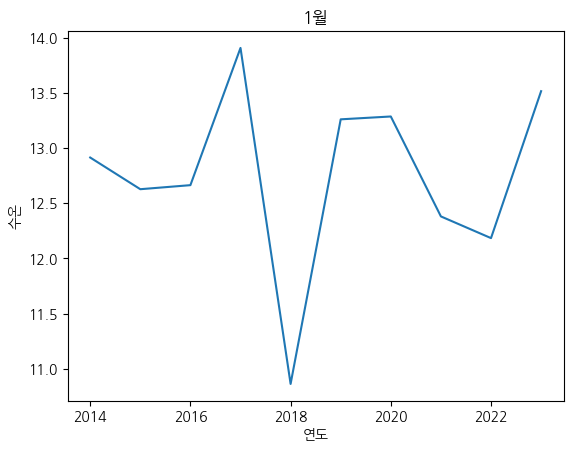

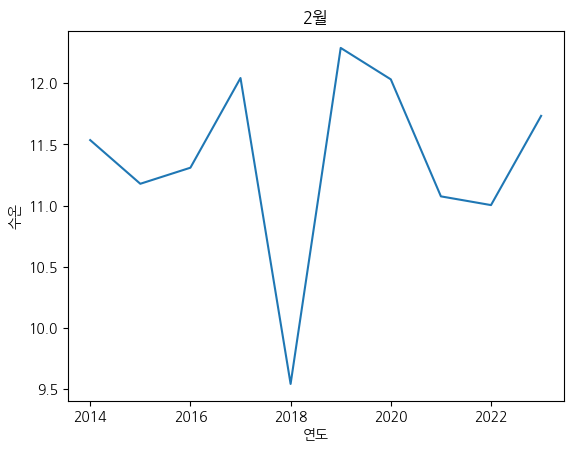

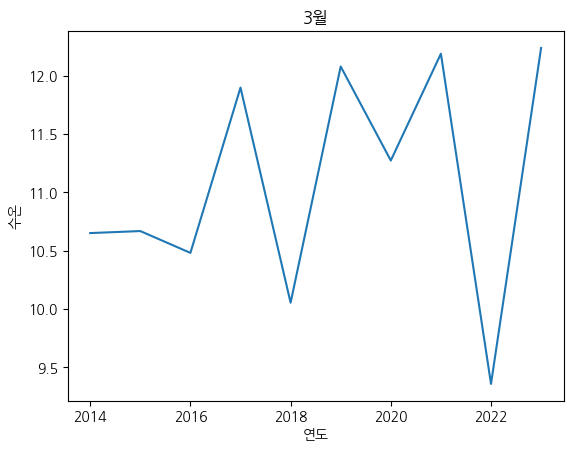

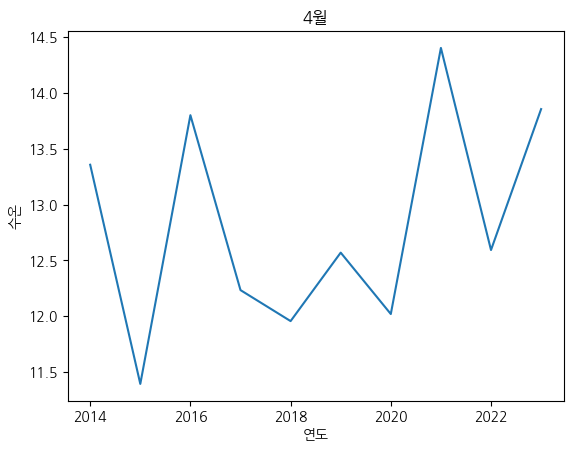

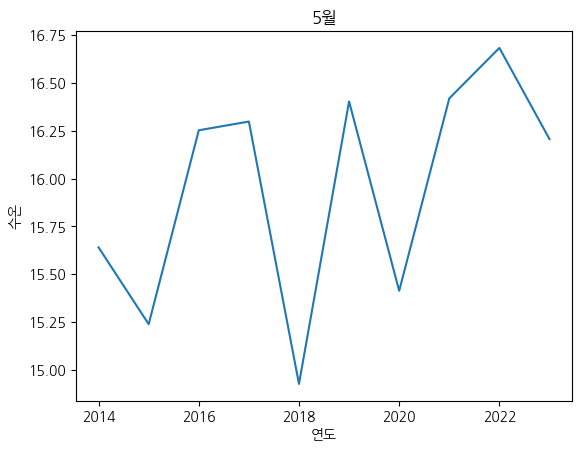

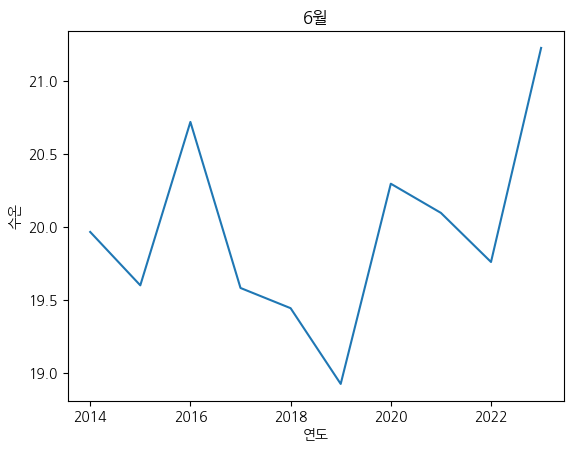

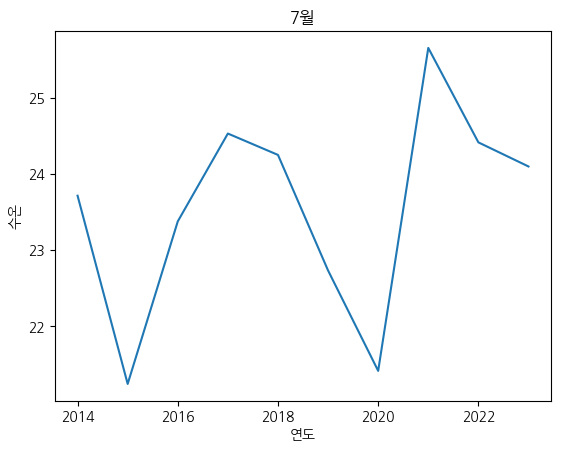

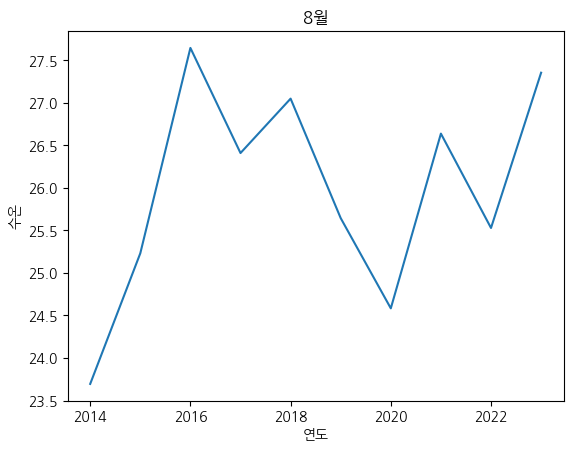

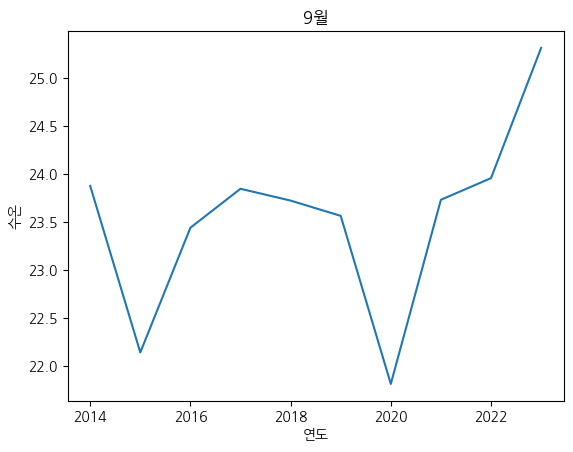

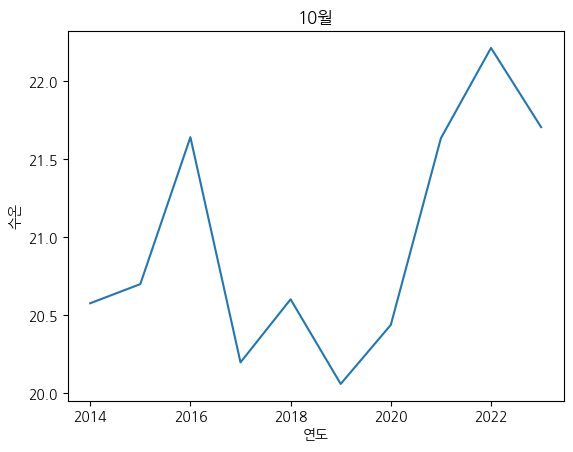

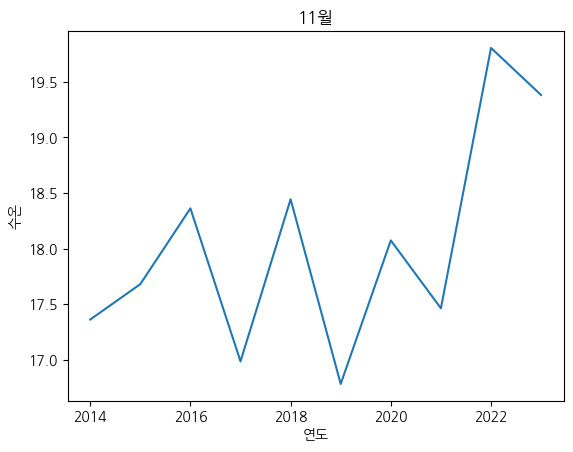

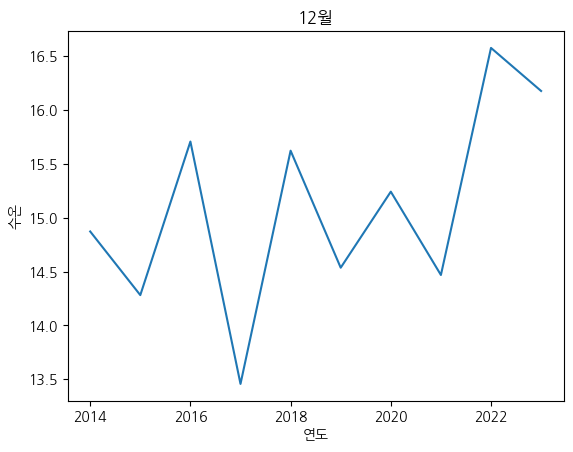

In [29]:
#월별 수온 변화 그래프 
for i in range(1,13):
    draw_graph(i, '수온')

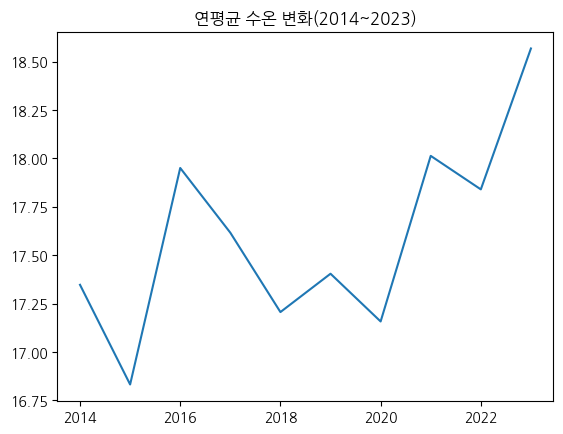

In [49]:
# 연평균 수온 변화 시각화
year_totals = [] 
for i in temp_list:
    year_total = sum(i) / 12
    year_totals.append(year_total) 
x=range(2014,2024)
y= year_totals
plt.plot(x,y)
plt.title('연평균 수온 변화(2014~2023)')
plt.show()

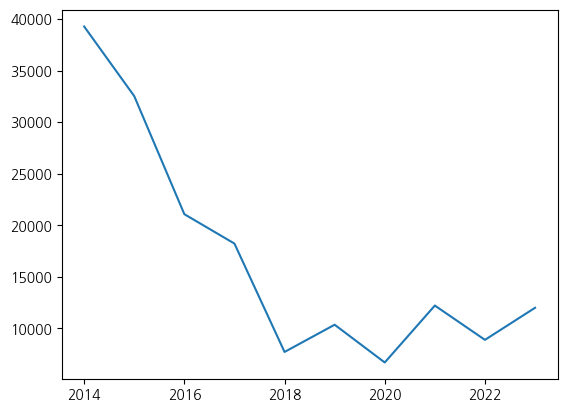

In [23]:
# 1월의 연도별 수확량 변화

y=cuttle_fish[cuttle_fish['월']==1]['합계_수']
x=cuttle_fish[cuttle_fish['월']==1]['연']

plt.plot(x,y)
plt.show()

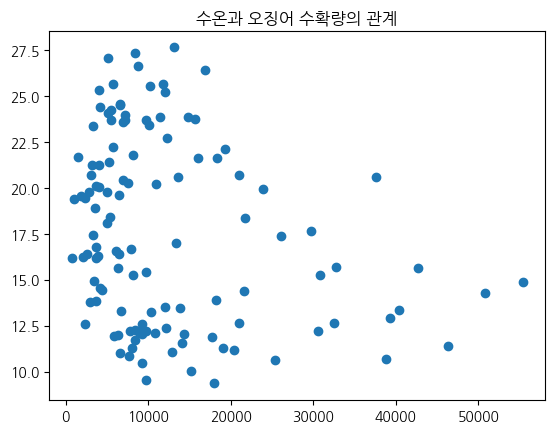

       합계_수     수온      연      월
합계_수  1.000 -0.267 -0.544 -0.055
수온   -0.267  1.000  0.059  0.580
연    -0.544  0.059  1.000  0.000
월    -0.055  0.580  0.000  1.000


In [70]:
# 월평균 수온과 수확량 산점도

plt.scatter(cuttle_fish['합계_수'], cuttle_fish['수온'])
plt.title('수온과 오징어 수확량의 관계')
plt.show()

# 상관관계
cuttle_fish['합계_수']= cuttle_fish['합계_수'].astype(int)
corr= cuttle_fish.corr(numeric_only=True).round(3)
corr.to_csv('./img/상관관계.csv', encoding='utf-8-sig')
print(corr)